<a href="https://colab.research.google.com/github/anjanirdy21/Pedestrian-Detection/blob/main/Pedestrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PennFudanPed.zip to PennFudanPed.zip


In [ ]:
!pip install ultralytics

  Using cached ultralytics-8.3.148-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [ ]:
import zipfile
import os

zip_path = "PennFudanPed.zip"
extract_path = "PennFudanPed"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped!")

✅ Unzipped!


In [ ]:
#Listed and Matched Image-Mask Pairs
import os

image_dir = 'PennFudanPed/PennFudanPed/PNGImages'
mask_dir = 'PennFudanPed/PennFudanPed/PedMasks'

#list actual files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

print(f"📸 Images found: {len(image_files)}")
print(f"🎭 Masks found: {len(mask_files)}")
print("Sample image:", image_files[:3])
print("Sample mask:", mask_files[:3])

📸 Images found: 170
🎭 Masks found: 170
Sample image: ['FudanPed00001.png', 'FudanPed00002.png', 'FudanPed00003.png']
Sample mask: ['FudanPed00001_mask.png', 'FudanPed00002_mask.png', 'FudanPed00003_mask.png']


In [ ]:
matches = []

for img_file in image_files:
    number = img_file[-9:-4] #00062
    expected_mask = f"FudanPed{number}_mask.png"
    if expected_mask in mask_files:
        matches.append((img_file, expected_mask))

print(f"✅ Matched image-mask pairs: {len(matches)}")
print("Sample matches:", matches[:5])

✅ Matched image-mask pairs: 148
Sample matches: [('FudanPed00001.png', 'FudanPed00001_mask.png'), ('FudanPed00002.png', 'FudanPed00002_mask.png'), ('FudanPed00003.png', 'FudanPed00003_mask.png'), ('FudanPed00004.png', 'FudanPed00004_mask.png'), ('FudanPed00005.png', 'FudanPed00005_mask.png')]


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

image_dir = 'PennFudanPed/PennFudanPed/PNGImages'
mask_dir = 'PennFudanPed/PennFudanPed/PedMasks'
output_image_dir = 'yolo_seg/images'
output_label_dir = 'yolo_seg/labels'

# Create output folders
for split in ['train', 'val']:
    os.makedirs(os.path.join(output_image_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_label_dir, split), exist_ok=True)

# Match based on number
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

matches = []
for img_file in image_files:
    number = img_file[-9:-4] #again 00062
    expected_mask = f"FudanPed{number}_mask.png"
    if expected_mask in mask_files:
        matches.append((img_file, expected_mask))

train_pairs, val_pairs = train_test_split(matches, test_size=0.2, random_state=42)


def process_mask(mask_path, image_size): # Converting segmentation mask into list of polygon of ppl shape in YOLO
    mask = np.array(Image.open(mask_path).convert("L"))
    _, thresh = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h, w = image_size #polygon points
    segments = []
    for contour in contours:
        if contour.shape[0] >= 4: #keeping valid polygons
            normalized = contour.squeeze(1).astype(float)
            normalized[:, 0] /= w #x-coordinates image-width
            normalized[:, 1] /= h #y-coordinates image-height
            segments.append(normalized.flatten().tolist())
    return segments

In [ ]:
#Checked folder contents
!ls yolo_seg/images/train | head
!ls yolo_seg/labels/train | head

FudanPed00001.png
FudanPed00004.png
FudanPed00005.png
FudanPed00006.png
FudanPed00007.png
FudanPed00008.png
FudanPed00009.png
FudanPed00016.png
FudanPed00021.png
FudanPed00022.png
FudanPed00001.txt
FudanPed00004.txt
FudanPed00005.txt
FudanPed00006.txt
FudanPed00007.txt
FudanPed00008.txt
FudanPed00009.txt
FudanPed00016.txt
FudanPed00021.txt
FudanPed00022.txt


In [ ]:
print("Train images:", len(os.listdir('yolo_seg/images/train')))
print("Val images:", len(os.listdir('yolo_seg/images/val')))

Train images: 77
Val images: 11


In [ ]:
#Created data.yaml file for YOLOv8
yaml_content = """
path: /content/yolo_seg
train: images/train
val: images/val

nc: 1
names: ["person"]
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

In [ ]:
#Trained YOLOv8 Segmentation model
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")
model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

train: Scanning /content/yolo_seg/labels/train.cache... 77 images, 0 backgrounds, 10 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]

train: /content/yolo_seg/images/train/PennPed00036.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0901      1.2514]
train: /content/yolo_seg/images/train/PennPed00044.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0836]
train: /content/yolo_seg/images/train/PennPed00046.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
train: /content/yolo_seg/images/train/PennPed00048.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2269      1.0592]
train: /content/yolo_seg/images/train/PennPed00053.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1751]
train: /content/yolo_seg/images/train/PennPed00054.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.233]
train: /content/yolo_seg/images/train/PennPed00057.png: ignoring corrupt image/label: non-normalized or out of b


val: Scanning /content/yolo_seg/labels/val.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]

Plotting labels to runs/segment/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.677      4.574      3.004      1.668         10        640: 100%|██████████| 5/5 [01:35<00:00, 19.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.29s/it]

                   all         11         20    0.00364        0.6     0.0454     0.0253    0.00242        0.4     0.0313     0.0226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.524      3.985      2.775      1.629         14        640: 100%|██████████| 5/5 [01:28<00:00, 17.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]

                   all         11         20    0.00394       0.65     0.0903     0.0404    0.00212       0.35       0.05     0.0352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.459      3.689      3.256      1.594          3        640: 100%|██████████| 5/5 [01:20<00:00, 16.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]

                   all         11         20    0.00424        0.7      0.112     0.0603    0.00303        0.5     0.0687     0.0434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.284      2.983      2.173      1.316         17        640: 100%|██████████| 5/5 [01:25<00:00, 17.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.20s/it]

                   all         11         20    0.00424        0.7      0.138     0.0655    0.00303        0.5      0.115     0.0555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.034      2.403      1.908      1.152         14        640: 100%|██████████| 5/5 [01:25<00:00, 17.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         11         20    0.00556       0.45      0.152      0.064    0.00556       0.45      0.145     0.0715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.289      2.995      2.283      1.325          5        640: 100%|██████████| 5/5 [01:23<00:00, 16.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.11s/it]

                   all         11         20      0.435        0.2      0.155     0.0729      0.326       0.15      0.131     0.0805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.359      2.936      2.172      1.355         18        640: 100%|██████████| 5/5 [01:22<00:00, 16.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         11         20    0.00424        0.7      0.212      0.157    0.00212       0.35      0.208      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.378      3.189      2.204      1.378          8        640: 100%|██████████| 5/5 [01:24<00:00, 16.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]

                   all         11         20    0.00303        0.5       0.23        0.2    0.00212       0.35      0.227      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.205      2.585      2.107      1.302          4        640: 100%|██████████| 5/5 [01:29<00:00, 17.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.26s/it]

                   all         11         20    0.00333       0.55       0.17     0.0764    0.00152       0.25      0.157      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.335      2.894      2.167      1.402          6        640: 100%|██████████| 5/5 [01:24<00:00, 16.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.15s/it]

                   all         11         20    0.00303        0.5      0.183      0.104    0.00182        0.3      0.172     0.0926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.291      2.779      2.019      1.324         15        640: 100%|██████████| 5/5 [01:27<00:00, 17.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.95s/it]

                   all         11         20      0.213        0.2      0.141      0.087      0.213        0.2       0.11     0.0823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.229      2.438      1.904      1.264         19        640: 100%|██████████| 5/5 [01:21<00:00, 16.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.82s/it]

                   all         11         20      0.206        0.1      0.116     0.0709      0.206        0.1      0.109     0.0845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.228       2.77      1.979      1.341          7        640: 100%|██████████| 5/5 [01:23<00:00, 16.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]

                   all         11         20      0.426       0.15       0.12     0.0555      0.426       0.15      0.114     0.0758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.218      2.866      1.882      1.287         11        640: 100%|██████████| 5/5 [01:20<00:00, 16.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         11         20      0.335        0.2      0.124      0.053      0.388      0.191      0.112     0.0703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.292      2.785      1.882      1.298          8        640: 100%|██████████| 5/5 [01:25<00:00, 17.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         11         20      0.223       0.25     0.0805     0.0275      0.032        0.1     0.0114    0.00188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.218      2.708      1.831      1.274         10        640: 100%|██████████| 5/5 [01:25<00:00, 17.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.52s/it]

                   all         11         20      0.137        0.1      0.117     0.0374      0.138       0.15     0.0328     0.0143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.192      2.523      1.761      1.263          8        640: 100%|██████████| 5/5 [01:35<00:00, 19.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]

                   all         11         20     0.0574       0.15     0.0383     0.0128     0.0387        0.1     0.0174    0.00883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.356      2.864      2.093      1.345          8        640: 100%|██████████| 5/5 [01:28<00:00, 17.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]

                   all         11         20     0.0822        0.3      0.038     0.0133     0.0982        0.2     0.0278     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.155      2.348      1.668      1.213          7        640: 100%|██████████| 5/5 [01:25<00:00, 17.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.33s/it]

                   all         11         20      0.106        0.3     0.0475     0.0227      0.099        0.3     0.0332     0.0185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.189      2.555      1.773      1.215         13        640: 100%|██████████| 5/5 [01:24<00:00, 16.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.10s/it]

                   all         11         20        0.3       0.25       0.12     0.0452      0.237        0.2     0.0787      0.037



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.269      2.526      1.734      1.358         10        640: 100%|██████████| 5/5 [01:25<00:00, 17.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]

                   all         11         20      0.213       0.25     0.0708     0.0322      0.213       0.25     0.0632     0.0351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.161      2.472      1.636      1.207         14        640: 100%|██████████| 5/5 [01:22<00:00, 16.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.16s/it]

                   all         11         20      0.117       0.25     0.0481     0.0233      0.117       0.25     0.0397     0.0253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.244      2.788      1.837      1.285          8        640: 100%|██████████| 5/5 [01:22<00:00, 16.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.13s/it]

                   all         11         20      0.209        0.2     0.0624     0.0274      0.209        0.2     0.0548     0.0314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.191      2.561      1.758      1.276         10        640: 100%|██████████| 5/5 [01:22<00:00, 16.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]

                   all         11         20        0.1       0.15     0.0386     0.0147     0.0558      0.104      0.023     0.0083



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.178      2.427      1.657      1.224         10        640: 100%|██████████| 5/5 [01:24<00:00, 16.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.20s/it]

                   all         11         20     0.0708        0.1      0.056      0.028     0.0487     0.0643     0.0346     0.0142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.197        2.8      1.729      1.262         11        640: 100%|██████████| 5/5 [01:23<00:00, 16.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         11         20      0.187       0.15      0.108     0.0402      0.124        0.1     0.0552     0.0306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G       1.15       2.59      1.608       1.28         10        640: 100%|██████████| 5/5 [01:23<00:00, 16.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.15s/it]

                   all         11         20       0.34        0.2      0.114     0.0549      0.221      0.157     0.0739     0.0458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.094      2.604      1.514      1.221         10        640: 100%|██████████| 5/5 [01:21<00:00, 16.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.11s/it]

                   all         11         20      0.196        0.2     0.0772     0.0362      0.196        0.2     0.0716     0.0359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.107      2.524      1.451      1.169         15        640: 100%|██████████| 5/5 [01:20<00:00, 16.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

                   all         11         20      0.172       0.15     0.0531      0.021      0.172       0.15      0.046     0.0254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.191      2.678      1.547      1.296         12        640: 100%|██████████| 5/5 [01:20<00:00, 16.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]

                   all         11         20      0.124       0.15     0.0497     0.0163      0.124       0.15     0.0376     0.0191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.073      2.479      1.431      1.174          9        640: 100%|██████████| 5/5 [01:20<00:00, 16.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]

                   all         11         20      0.113       0.15     0.0409     0.0178      0.155        0.2     0.0367     0.0201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.9823      2.129      1.366      1.114          9        640: 100%|██████████| 5/5 [01:19<00:00, 15.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]

                   all         11         20      0.293        0.2      0.101     0.0573      0.293        0.2      0.095      0.063



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.9873      2.128      1.239      1.119         12        640: 100%|██████████| 5/5 [01:21<00:00, 16.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         11         20       0.21        0.2     0.0731     0.0332       0.21        0.2     0.0675     0.0423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.9951        2.4      1.488      1.179          6        640: 100%|██████████| 5/5 [01:18<00:00, 15.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]

                   all         11         20      0.172        0.2     0.0486     0.0277      0.172        0.2     0.0465     0.0311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9955       2.12      1.279      1.139         15        640: 100%|██████████| 5/5 [01:19<00:00, 15.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.60s/it]

                   all         11         20      0.143       0.25     0.0462     0.0232      0.112       0.15     0.0334     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G       1.07      2.446      1.377      1.202         13        640: 100%|██████████| 5/5 [01:18<00:00, 15.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]

                   all         11         20      0.122        0.2     0.0313     0.0235      0.122        0.2     0.0279     0.0214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.004      2.358      1.426      1.153         11        640: 100%|██████████| 5/5 [01:20<00:00, 16.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]

                   all         11         20      0.108        0.2     0.0299     0.0181      0.108        0.2      0.024      0.017



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.029      2.389      1.354      1.165          8        640: 100%|██████████| 5/5 [01:20<00:00, 16.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.15s/it]

                   all         11         20      0.221       0.25     0.0758     0.0424      0.248       0.15     0.0567     0.0421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      0.949      2.027      1.299      1.096         12        640: 100%|██████████| 5/5 [01:20<00:00, 16.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         11         20      0.379        0.2      0.142      0.086      0.379        0.2      0.135      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.038      2.517      1.311      1.161         14        640: 100%|██████████| 5/5 [01:19<00:00, 15.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]

                   all         11         20      0.553        0.2      0.143     0.0826      0.553        0.2       0.14      0.103


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.8067      2.124      1.326      1.063          6        640: 100%|██████████| 5/5 [01:21<00:00, 16.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         11         20      0.545        0.2      0.157      0.101      0.545        0.2      0.155       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      0.861      2.226      1.406      1.083          4        640: 100%|██████████| 5/5 [01:16<00:00, 15.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         11         20      0.644        0.2      0.172      0.126      0.644        0.2      0.168      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8277      2.077      1.287       1.04          3        640: 100%|██████████| 5/5 [01:18<00:00, 15.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

                   all         11         20      0.432      0.191      0.169      0.132      0.432      0.191      0.165      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.8409      2.114      1.195      1.083          5        640: 100%|██████████| 5/5 [01:17<00:00, 15.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]

                   all         11         20      0.252        0.2      0.106     0.0741      0.252        0.2      0.101     0.0668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8029      1.975      1.108      1.047          4        640: 100%|██████████| 5/5 [01:18<00:00, 15.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         11         20      0.267      0.183      0.108     0.0785      0.267      0.183      0.101      0.069



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.8421      2.065      1.184      1.083          5        640: 100%|██████████| 5/5 [01:18<00:00, 15.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.96s/it]

                   all         11         20      0.182       0.15     0.0994     0.0812      0.182       0.15     0.0952      0.071



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9528      2.261      1.397      1.121          4        640: 100%|██████████| 5/5 [01:18<00:00, 15.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

                   all         11         20      0.344        0.1     0.0923     0.0751      0.344        0.1     0.0859     0.0661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8103      2.165      1.197      1.042          6        640: 100%|██████████| 5/5 [01:18<00:00, 15.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.15s/it]

                   all         11         20      0.261        0.1     0.0864     0.0666      0.261        0.1     0.0845     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.722      1.909      1.123     0.9975          3        640: 100%|██████████| 5/5 [01:22<00:00, 16.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]

                   all         11         20      0.182        0.1     0.0557     0.0398      0.182        0.1     0.0484     0.0361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.7333      1.881      1.094      1.033          5        640: 100%|██████████| 5/5 [01:17<00:00, 15.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]

                   all         11         20      0.116        0.1     0.0553     0.0402      0.116        0.1     0.0473     0.0352



50 epochs completed in 1.231 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]


                   all         11         20    0.00303        0.5       0.23        0.2    0.00212       0.35      0.227      0.174
Speed: 2.7ms preprocess, 319.9ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/segment/train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f44ab654610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
#Ran Predictions on val image
results = model.predict(
    source="yolo_seg/images/val", #contain val images to predict
    save=True,
    project="runs/segment",  # base folder
    name="predict",      # new folder name
    exist_ok=True
)


image 1/11 /content/yolo_seg/images/val/FudanPed00012.png: 544x640 (no detections), 477.2ms
image 2/11 /content/yolo_seg/images/val/FudanPed00019.png: 576x640 (no detections), 487.7ms
image 3/11 /content/yolo_seg/images/val/FudanPed00037.png: 576x640 (no detections), 437.9ms
image 4/11 /content/yolo_seg/images/val/FudanPed00056.png: 640x640 (no detections), 369.3ms
image 5/11 /content/yolo_seg/images/val/FudanPed00065.png: 544x640 (no detections), 275.4ms
image 6/11 /content/yolo_seg/images/val/PennPed00008.png: 576x640 (no detections), 288.2ms
image 7/11 /content/yolo_seg/images/val/PennPed00009.png: 416x640 (no detections), 240.8ms
image 8/11 /content/yolo_seg/images/val/PennPed00045.png: 384x640 (no detections), 210.7ms
image 9/11 /content/yolo_seg/images/val/PennPed00058.png: 480x640 (no detections), 261.8ms
image 10/11 /content/yolo_seg/images/val/PennPed00062.png: 512x640 (no detections), 277.4ms
image 11/11 /content/yolo_seg/images/val/PennPed00071.png: 320x640 (no detections),

Sample prediction images: ['FudanPed00056.jpg', 'PennPed00009.jpg', 'PennPed00062.jpg', 'FudanPed00012.jpg', 'PennPed00071.jpg']


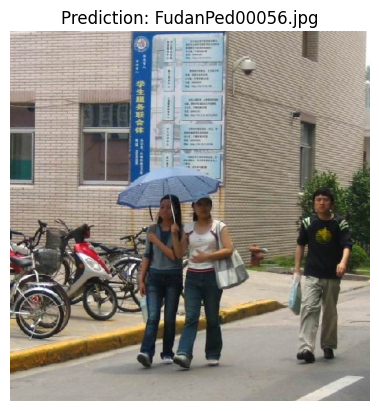

In [ ]:
#Visualised sample predictions
import matplotlib.pyplot as plt
from PIL import Image
import os

# List prediction images
pred_folder = "runs/segment/predict"
pred_images = os.listdir(pred_folder)
print("Sample prediction images:", pred_images[:5])

# Displaying a sample prediction image
img_path = os.path.join(pred_folder, pred_images[0])
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_images[0]}")
plt.show()

In [ ]:
#Evaluated model performance
metrics = model.val()
print(metrics)

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1831.3±143.3 MB/s, size: 315.0 KB)


val: Scanning /content/yolo_seg/labels/val.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.15s/it]


                   all         11         20    0.00303        0.5       0.23        0.2    0.00212       0.35      0.227      0.174
Speed: 7.5ms preprocess, 434.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/segment/train311
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f44ab9e0290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022

In [ ]:
model.export(format="onnx")

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/segment/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 7.3s, saved as 'runs/segment/train3/weights/best.onnx' (12.7 MB)

Export complete (8.0s)
Results saved to /content/runs/segment/train3/weights
Predict:         yolo predict task=segment model=runs/segment/train3/weights/best.onnx imgsz=640  

'runs/segment/train3/weights/best.onnx'